In [1]:
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(emmeans))
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(export))
suppressPackageStartupMessages(library(patchwork))
suppressPackageStartupMessages(library(ggpubr))

Warning message:
“package ‘emmeans’ was built under R version 3.6.2”


In [38]:
version

               _                           
platform       x86_64-apple-darwin15.6.0   
arch           x86_64                      
os             darwin15.6.0                
system         x86_64, darwin15.6.0        
status                                     
major          3                           
minor          6.1                         
year           2019                        
month          07                          
day            05                          
svn rev        76782                       
language       R                           
version.string R version 3.6.1 (2019-07-05)
nickname       Action of the Toes          

In [2]:
pars <- function(x){
	r <- quantile(x, probs = c(0.10, 0.25, 0.5, 0.75, 0.90))
	names(r) <- c("ymin", "lower", "middle", "upper", "ymax")
	r
}
outliers <- function(x){
	subset(x, x < quantile(x, probs = 0.1) | quantile(x, probs = 0.9) < x)
}

In [3]:
theme_legend_free = function(){
	theme(axis.title.y = element_text(size = 15, 
	margin = margin(t=0, r=5, b=0, l=10)),
	axis.text.y = element_text(size = 15, face = 'bold'),
	axis.text.x = element_text(size = 15, face= 'bold'),
	axis.ticks.x = element_blank(),
    plot.title = element_text(size=13),
	legend.position = "none",
	plot.margin = unit(c(0.5,0.5,0,0.5), "cm"),
	panel.grid = element_blank(),
	panel.grid.major = element_blank(),
	panel.grid.minor = element_blank())
}

italic.text <- element_text(face = "italic")
theme_legend = function(){
	theme(axis.title.y = element_text(size = 14,
	margin = margin(t=0, r=5, b=0, l=10)),
	axis.text.y = element_text(size = 15, face = 'bold'),
	axis.text.x = element_text(size = 15, face= 'bold'),
	axis.title.x = element_text(size = 14),
    axis.title = italic.text,
	axis.ticks.x = element_blank(),
    plot.title = element_text(size=13),
	legend.position = "bottom",
	plot.margin = unit(c(0.5,0.5,0,0.5), "cm"),
	panel.grid = element_blank(),
	panel.grid.major = element_blank(),
	panel.grid.minor = element_blank())
}

# Liver tissue

In [4]:
data_liver <- read.csv('liverTissue.csv')
data_liver$treatment <- as.factor(data_liver$treatment)
colors <- c("#0080ff", "darkgreen")
head(data_liver)

,X,treatment,pparg,mogat1,plin4,cidec,bw,lv_wt,lv_pct,lv_TAG
,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,13,HFD,0.02909908,0.1099829,0.13973055,-0.4210752,48.9,2.26,4.621677,500.76
2,14,HFD,0.10243241,-0.4333504,0.08306388,0.6055914,52.2,2.51,4.808429,480.48
3,15,HFD,0.29909908,0.4733163,0.52306388,0.6055914,51.6,2.81,5.445736,633.36
4,16,HFD,-0.47423426,-0.1766837,-0.73026945,-1.1544086,52.9,2.70,5.103970,535.08
5,17,HFD,-0.31423426,-1.1933504,-0.44360278,-0.6777419,46.5,1.46,3.139785,402.87
6,18,HFD,0.32909908,0.5499829,0.52639722,0.6522581,51.8,2.77,5.347490,563.94


In [37]:
# a t-test and a regression at the same time
#model.matrix(~data_liver$treatment + data_liver$mogat1)

In [36]:
model <- lm(lv_pct ~ treatment + mogat1, data = data_liver)
summary(model)


Call:
lm(formula = lv_pct ~ treatment + mogat1, data = data_liver)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.18931 -0.16769 -0.00571  0.26242  0.93424 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)        5.0053     0.1566  31.961  < 2e-16 ***
treatmentHFD+TXN  -0.5885     0.4017  -1.465  0.15841    
mogat1             0.5667     0.1663   3.408  0.00279 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5409 on 20 degrees of freedom
Multiple R-squared:  0.7771,	Adjusted R-squared:  0.7548 
F-statistic: 34.86 on 2 and 20 DF,  p-value: 3.031e-07


**Note:
p value for Mogat1 expression is significant (0.00279), which means that the 2-parameter fit is significantly better than 1-parameter fit, which is only treatment.**

In [45]:
model <- lm(lv_pct ~ mogat1, data = data_liver)
summary(model)


Call:
lm(formula = lv_pct ~ mogat1, data = data_liver)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.00469 -0.34075 -0.00623  0.34985  0.95465 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.93125    0.15222  32.396  < 2e-16 ***
mogat1       0.76816    0.09597   8.004 8.16e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5554 on 21 degrees of freedom
Multiple R-squared:  0.7531,	Adjusted R-squared:  0.7414 
F-statistic: 64.07 on 1 and 21 DF,  p-value: 8.162e-08


In [46]:
model <- lm(lv_pct ~ treatment, data = data_liver)
summary(model)


Call:
lm(formula = lv_pct ~ treatment, data = data_liver)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8238 -0.1963 -0.0836  0.3609  1.1932 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)        4.9636     0.1916  25.910  < 2e-16 ***
treatmentHFD+TXN  -1.7209     0.2770  -6.212 3.67e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6636 on 21 degrees of freedom
Multiple R-squared:  0.6476,	Adjusted R-squared:  0.6308 
F-statistic: 38.59 on 1 and 21 DF,  p-value: 3.665e-06


In [320]:
pparg <- ggplot(data = data_liver, aes(x = treatment, y = pparg, fill = treatment)) +
    geom_hline(yintercept = 0, lty = 5) +
	stat_summary(fun.data = pars, geom = "boxplot", position = "dodge", width=0.2) +
	stat_summary(fun = outliers, geom = "point") +
	scale_fill_manual(values = alpha(colors, .6), guide = FALSE) +
    #scale_y_continuous(limits = c(-3, 3))+
	xlab(" ") + ylab("log2FoldChange") +
	ggtitle("Ppar\u03B3") +
	theme_bw() +
	theme_legend_free()

label.df <- data.frame(treatment = c("HFD+TXN"),
                       pparg = c(-0.3))
pparg <- pparg + geom_text(data = label.df, label = c("***"), color='red', size = 12)

In [321]:
cid <- ggplot(data = data_liver, aes(x = treatment, y = cidec, fill = treatment)) +
    geom_hline(yintercept = 0, lty = 5) +
	stat_summary(fun.data = pars, geom = "boxplot", position = "dodge", width=0.2) +
	stat_summary(fun = outliers, geom = "point") +
	scale_fill_manual(values = alpha(colors, .6), guide = FALSE) +
    #scale_y_continuous(limits = c(-3, 3))+
	xlab(" ") + ylab("log2FoldChange") +
	ggtitle("Cidec") +
	theme_bw() +
	theme_legend_free()

label.df <- data.frame(treatment = c("HFD+TXN"),
                       cidec = c(-2))
cid <- cid + geom_text(data = label.df, label = c("***"), color='red', size = 12)

In [322]:
plin <- ggplot(data = data_liver, aes(x = treatment, y = plin4, fill = treatment)) +
    geom_hline(yintercept = 0, lty = 5) +
	stat_summary(fun.data = pars, geom = "boxplot", position = "dodge", width=0.2) +
	stat_summary(fun = outliers, geom = "point") +
	scale_fill_manual(values = alpha(colors, .6), guide = FALSE) +
    #scale_y_continuous(limits = c(-3, 3))+
	xlab(" ") + ylab("log2FoldChange") +
	ggtitle("Plin4") +
	theme_bw() +
	theme_legend_free()

label.df <- data.frame(treatment = c("HFD+TXN"),
                       plin4 = c(-0.8))
plin <- plin + geom_text(data = label.df, label = c("***"), color='red', size = 12)

In [323]:
mog <- ggplot(data = data_liver, aes(x = treatment, y = mogat1, fill = treatment)) +
    geom_hline(yintercept = 0, lty = 5) +
	stat_summary(fun.data = pars, geom = "boxplot", position = "dodge", width=0.2) +
	stat_summary(fun = outliers, geom = "point") +
	scale_fill_manual(values = alpha(colors, .6), guide = FALSE) +
    #scale_y_continuous(limits = c(-3, 3))+
	xlab(" ") + ylab("log2FoldChange") +
	ggtitle('Mogat1') +
	theme_bw() +
	theme_legend_free()

label.df <- data.frame(treatment = c("HFD+TXN"),
                       mogat1 = c(-0.4))
mog <- mog + geom_text(data = label.df, label = c("***"), color='red', size = 12)

In [199]:
plot <- (pparg | cid) / (plin | mog)
plot2 <- plot & theme(plot.title = element_text(size = 14, face='bold'))

In [200]:
graph2pdf(plot2, file = "liverPCR.pdf", width = 8, height = 8)
graph2svg(plot2, file = "liverPCR.svg", width = 12, height = 8)

Exported graph as liverPCR.pdf

Exported graph as liverPCR.svg



In [391]:
scatter1 <- ggplot(data_liver, aes(x = pparg, y = cidec)) + 
    geom_rug(aes(color = treatment)) +
    geom_point(aes(color = treatment, size = lv_pct), alpha=0.5) +
    scale_size(range = c(1, 14), guide=guide_legend(title="Liver mass:BW (%)")) +
    stat_smooth(method = "lm", formula = y ~ x, col = "black", se = FALSE, linetype = "dashed", size = 0.5)+
    stat_cor(label.x = -0.7, label.y = -4.85, r.digits = 2, p.digits = 2, color = 'red') +
    #stat_regline_equation(label.x = -1.3, label.y = 0) +
    scale_color_manual(name = "Diet", values = colors, guide = FALSE)+
    labs(x = 'Ppar\u03B3', y = 'Cidec') +
	theme_bw() + theme_legend()

In [394]:
scatter3 <- ggplot(data_liver, aes(x = pparg, y = plin4)) + 
    geom_rug(aes(color = treatment)) +
    geom_point(aes(color = treatment, size = lv_pct), alpha=0.5) +
    scale_size(range = c(1, 14), guide=guide_legend(title="Liver mass:BW (%)")) +
    stat_smooth(method = "lm", formula = y ~ x, col = "black", se = FALSE, linetype = "dashed", size = 0.5)+
    stat_cor(label.x = -0.7, label.y = -2.8, r.digits = 2, p.digits = 2, color = 'red') +
    scale_color_manual(name = "Diet", values = colors, guide = FALSE)+
    labs(x = 'Ppar\u03B3', y = 'Plin4') +
	theme_bw() + theme_legend()

In [395]:
scatter4 <- ggplot(data_liver, aes(x = pparg, y = mogat1)) + 
    geom_rug(aes(color = treatment)) +
    geom_point(aes(color = treatment, size = lv_pct), alpha=0.5) +
    scale_size(range = c(1, 14), guide=guide_legend(title="Liver mass:BW (%)")) +
    stat_smooth(method = "lm", formula = y ~ x, col = "black", se = FALSE, linetype = "dashed", size = 0.5)+
    stat_cor(label.x = -0.7, label.y = -3.3, r.digits = 2, p.digits = 2, color = 'red') +
    scale_color_manual(name = "Diet", values = colors, guide = FALSE)+
    labs(x = 'Ppar\u03B3', y = expression(italic('Mogat1'))) +
	theme_bw() + theme_legend()

In [396]:
scatter5 <- ggplot(data_liver, aes(x = mogat1, y = cidec)) + 
    geom_rug(aes(color = treatment)) +
    geom_point(aes(color = treatment, size = lv_pct), alpha=0.5) +
    scale_size(range = c(1, 14), guide=guide_legend(title="Liver mass:BW (%)")) +
    stat_smooth(method = "lm", formula = y ~ x, col = "black", se = FALSE, linetype = "dashed", size = 0.5)+
    stat_cor(label.x = -1.7, label.y = -4.5, r.digits = 2, p.digits = 2, color = 'red') +
    scale_color_manual(name = "Diet", values = colors, guide = FALSE)+
    labs(x = 'Mogat1', y = 'Cidec') +
	theme_bw() + theme_legend()

In [249]:
plot <- (scatter1 | scatter3) / (scatter4 | scatter5)
#plot2 <- plot & theme(plot.title = element_text(size = 14, face='bold'))
plot2 <- plot + plot_layout(guides = "collect")

In [250]:
graph2pdf(plot2, file = "liverscatter.pdf", width = 12, height = 8)
graph2svg(plot2, file = "liverscatter.svg", width = 12, height = 8)

Exported graph as liverscatter.pdf

Exported graph as liverscatter.svg



In [397]:
plotA <- (pparg | cid | plin | mog)& theme(legend.position = 'none')
plotB <- (scatter5 | scatter1 | scatter3 | scatter4)& theme(legend.position = 'bottom')
pcr <- (plotA / plotB) + plot_layout(guides = "collect")& theme(legend.position = 'bottom')

In [398]:
graph2svg(pcr, file = "liverscatterPCR.svg", width = 16, height = 10)
graph2pdf(pcr, file = "liverscatterPCR.pdf", width = 16, height = 10)

Exported graph as liverscatterPCR.svg

Exported graph as liverscatterPCR.pdf



In [402]:
scatter6 <- ggplot(data_liver, aes(x = pparg, y = cidec)) + 
    geom_rug(aes(color = treatment)) +
    geom_point(aes(color = treatment, size = lv_TAG), alpha=0.5) +
    scale_size(range = c(1, 14), guide=guide_legend(title="Liver TAG")) +
    stat_smooth(method = "lm", formula = y ~ x, col = "black", se = FALSE, linetype = "dashed", size = 0.5)+
    stat_cor(label.x = -0.7, label.y = -4.85, r.digits = 2, p.digits = 2, color = 'red') +
    #stat_regline_equation(label.x = -1.3, label.y = 0) +
    scale_color_manual(name = "Diet", values = colors, guide = FALSE)+
    labs(x = 'Ppar\u03B3', y = 'Cidec') +
	theme_bw() + theme_legend()

In [403]:
scatter7 <- ggplot(data_liver, aes(x = pparg, y = plin4)) + 
    geom_rug(aes(color = treatment)) +
    geom_point(aes(color = treatment, size = lv_TAG), alpha=0.5) +
    scale_size(range = c(1, 14), guide=guide_legend(title="Liver TAG")) +
    stat_smooth(method = "lm", formula = y ~ x, col = "black", se = FALSE, linetype = "dashed", size = 0.5)+
    stat_cor(label.x = -0.7, label.y = -2.8, r.digits = 2, p.digits = 2, color = 'red') +
    scale_color_manual(name = "Diet", values = colors, guide = FALSE)+
    labs(x = 'Ppar\u03B3', y = 'Plin4') +
	theme_bw() + theme_legend()

In [404]:
scatter8 <- ggplot(data_liver, aes(x = pparg, y = mogat1)) + 
    geom_rug(aes(color = treatment)) +
    geom_point(aes(color = treatment, size = lv_TAG), alpha=0.5) +
    scale_size(range = c(1, 14), guide=guide_legend(title="Liver TAG")) +
    stat_smooth(method = "lm", formula = y ~ x, col = "black", se = FALSE, linetype = "dashed", size = 0.5)+
    stat_cor(label.x = -0.7, label.y = -3.3, r.digits = 2, p.digits = 2, color = 'red') +
    scale_color_manual(name = "Diet", values = colors, guide = FALSE)+
    labs(x = 'Ppar\u03B3', y = expression(italic('Mogat1'))) +
	theme_bw() + theme_legend()

In [405]:
scatter9 <- ggplot(data_liver, aes(x = mogat1, y = cidec)) + 
    geom_rug(aes(color = treatment)) +
    geom_point(aes(color = treatment, size = lv_TAG), alpha=0.5) +
    scale_size(range = c(1, 14), guide=guide_legend(title="Liver TAG")) +
    stat_smooth(method = "lm", formula = y ~ x, col = "black", se = FALSE, linetype = "dashed", size = 0.5)+
    stat_cor(label.x = -1.7, label.y = -4.5, r.digits = 2, p.digits = 2, color = 'red') +
    scale_color_manual(name = "Diet", values = colors, guide = FALSE)+
    labs(x = 'Mogat1', y = 'Cidec') +
	theme_bw() + theme_legend()

In [408]:
plotC <- (scatter6 | scatter7 | scatter8 | scatter9)& theme(legend.position = 'bottom')
pcr2 <- (plotA / plotB / plotC) + plot_layout(guides = "collect")& theme(legend.position = 'bottom')
graph2pdf(pcr2, file = "liverscatterPCR2.pdf", width = 16, height = 13)

Exported graph as liverscatterPCR2.pdf



# Cell culture

In [4]:
data_dmso <- read.csv('24h-dmso.csv')
data_dmso$treatment <- as.factor(data_dmso$treatment)
data_dmso$vars <- factor(data_dmso$treatment, levels = c("DMSO", "Rosi", "GW", "XN", "TXN"))
colors <- c("grey", "red", "blue", "gold", "darkgreen")
head(data_dmso)

data_r <- read.csv('24h-rosi.csv')
data_r$treatment <- as.factor(data_r$treatment)
data_r$vars <- factor(data_r$treatment, levels = c("Rosi", "Rosi+GW", "Rosi+XN", "Rosi+TXN"))
colorsR <- c("red", "blue", "gold", "darkgreen")
head(data_r)

,X,treatment,pparg,pgc1a,fabp4,cd36,scd1,srebp1c,lpl,plin4,cidec,vars
,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,1,DMSO,0.3606192,0.22910166,0.5023825,0.6679965,0.4224275,0.3639615,0.6792995,-0.24551692,-0.2302880,DMSO
2,2,DMSO,-0.2393808,0.02576833,-0.0176175,-0.1386702,-0.1509058,-0.1393718,-0.5807005,0.05781642,0.6363786,DMSO
3,3,DMSO,-0.2027141,-0.30423167,-0.7476175,-0.9920035,-0.3975725,-0.3127051,-0.4540338,0.15781642,-0.7536214,DMSO
4,4,Rosi,0.3439525,0.80576833,2.5190492,3.2446631,0.5057608,0.3006282,1.0876329,1.11448308,2.6263786,Rosi
5,5,Rosi,-0.2893808,0.37243500,1.6323825,2.1913298,-0.2242392,-0.2060385,-0.3440338,0.49781642,2.3397120,Rosi
6,6,Rosi,-0.4427141,0.13910166,1.6757158,1.9396631,-0.5042392,-0.4593718,-0.3940338,0.67114975,1.7463786,Rosi


,X,treatment,pparg,pgc1a,fabp4,cd36,scd1,srebp1c,lpl,plin4,cidec,vars
,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,1,Rosi,0.4315676,0.33976545,0.51579885,0.6691933,0.51320438,0.3868813,0.7952105,0.32939562,0.34424432,Rosi
2,2,Rosi,-0.2017657,-0.09356789,-0.37086782,-0.3841400,-0.21346228,-0.1197853,-0.6364562,-0.28727105,0.05757765,Rosi
3,3,Rosi,-0.3550990,-0.32690122,-0.32753448,-0.6358067,-0.49346228,-0.3731187,-0.6864562,-0.11393771,-0.53575568,Rosi
4,4,Rosi+GW,0.3415676,0.18643211,0.02246552,0.2058600,0.51653772,0.4735480,0.7185438,-0.44727104,-0.97908902,Rosi+GW
5,5,Rosi+GW,-0.1817657,0.04309878,-0.70420115,-0.4608067,-0.06346228,0.0735480,-0.3731229,-0.02060438,-0.40575568,Rosi+GW
6,6,Rosi+GW,-0.3217657,-0.30690122,-0.59086782,-0.7041400,-0.40012895,-0.4164520,-0.6297895,-0.37393771,-0.36242235,Rosi+GW


In [5]:
data_dmso7 <- read.csv('7d-dmso.csv')
data_dmso7$treatment <- as.factor(data_dmso7$treatment)
data_dmso7$vars <- factor(data_dmso7$treatment, levels = c("DMSO", "Rosi", "GW", "XN", "TXN"))
colors <- c("grey", "red", "blue", "gold", "darkgreen")
head(data_dmso7)

data_r7 <- read.csv('7d-rosi.csv')
data_r7$treatment <- as.factor(data_r7$treatment)
data_r7$vars <- factor(data_r7$treatment, levels = c("Rosi", "Rosi+GW", "Rosi+XN", "Rosi+TXN"))
colorsR <- c("red", "blue", "gold", "darkgreen")
head(data_r7)

,X,treatment,cd36,plin4,cidec,vars
,<int>,<fct>,<dbl>,<dbl>,<dbl>,<fct>
1,1,DMSO,0.21144292,0.2669615,0.2307750,DMSO
2,2,DMSO,-0.05189041,-0.1697051,-0.1292250,DMSO
3,3,DMSO,-0.18855708,-0.1397051,-0.1325583,DMSO
4,4,Rosi,4.46144292,2.4736282,4.5674417,Rosi
5,5,Rosi,4.23144292,2.4169615,4.3407750,Rosi
6,6,Rosi,4.25144292,2.4336282,4.3141083,Rosi


,X,treatment,cd36,plin4,cidec,vars
,<int>,<fct>,<dbl>,<dbl>,<dbl>,<fct>
1,1,Rosi,0.14285654,0.032025775,0.15544672,Rosi
2,2,Rosi,-0.08714346,-0.024640892,-0.07121995,Rosi
3,3,Rosi,-0.06714346,-0.007974225,-0.09788661,Rosi
4,4,Rosi+GW,0.02285654,0.112025775,0.03544672,Rosi+GW
5,5,Rosi+GW,-0.21714346,-0.091307559,-0.06455328,Rosi+GW
6,6,Rosi+GW,-0.36047679,-0.311307559,-0.51455328,Rosi+GW


In [5]:
pparg <- ggplot(data = data_dmso, aes(x = vars, y = pparg, fill = vars)) +
    geom_hline(yintercept = 0, lty = 5) +
	stat_summary(fun.data = pars, geom = "boxplot", position = "dodge", width=0.2) +
	stat_summary(fun.y = outliers, geom = "point") +
	scale_fill_manual(values = alpha(colors, .6)) +
    #scale_y_continuous(limits = c(-3, 3))+
	xlab(" ") + ylab("log2FoldChange") +
	ggtitle("Ppar\u03B3") +
	theme_bw() +
	theme_legend_free()

ppargR <- ggplot(data = data_r, aes(x = vars, y = pparg, fill = vars)) +
    geom_hline(yintercept = 0, lty = 5) +
	stat_summary(fun.data = pars, geom = "boxplot", position = "dodge", width=0.2) +
	stat_summary(fun.y = outliers, geom = "point") +
	scale_fill_manual(values = alpha(colorsR, .6)) +
    #scale_y_continuous(limits = c(-3, 3))+
	xlab(" ") + ylab("log2FoldChange") +
	ggtitle("Ppar\u03B3") +
	theme_bw() +
	theme_legend_free()

In [6]:
pgc <- ggplot(data = data_dmso, aes(x = vars, y = pgc1a, fill = vars)) +
    geom_hline(yintercept = 0, lty = 5) +
	stat_summary(fun.data = pars, geom = "boxplot", position = "dodge", width=0.2) +
	stat_summary(fun.y = outliers, geom = "point") +
	scale_fill_manual(values = alpha(colors, .6)) +
    #scale_y_continuous(limits = c(-3, 3))+
	xlab(" ") + ylab("log2FoldChange") +
	ggtitle("Pgc1\u03B1") +
	theme_bw() +
	theme_legend_free()

pgcR <- ggplot(data = data_r, aes(x = vars, y = pgc1a, fill = vars)) +
    geom_hline(yintercept = 0, lty = 5) +
	stat_summary(fun.data = pars, geom = "boxplot", position = "dodge", width=0.2) +
	stat_summary(fun.y = outliers, geom = "point") +
	scale_fill_manual(values = alpha(colorsR, .6)) +
    #scale_y_continuous(limits = c(-3, 3))+
	xlab(" ") + ylab("log2FoldChange") +
	ggtitle("Pgc1\u03B1") +
	theme_bw() +
	theme_legend_free()

In [7]:
fab <- ggplot(data = data_dmso, aes(x = vars, y = fabp4, fill = vars)) +
    geom_hline(yintercept = 0, lty = 5) +
	stat_summary(fun.data = pars, geom = "boxplot", position = "dodge", width=0.2) +
	stat_summary(fun.y = outliers, geom = "point") +
	scale_fill_manual(values = alpha(colors, .6)) +
    #scale_y_continuous(limits = c(-3, 3))+
	xlab(" ") + ylab("log2FoldChange") +
	ggtitle("Fabp4/aP2") +
	theme_bw() +
	theme_legend_free()

fabR <- ggplot(data = data_r, aes(x = vars, y = fabp4, fill = vars)) +
    geom_hline(yintercept = 0, lty = 5) +
	stat_summary(fun.data = pars, geom = "boxplot", position = "dodge", width=0.2) +
	stat_summary(fun.y = outliers, geom = "point") +
	scale_fill_manual(values = alpha(colorsR, .6)) +
    #scale_y_continuous(limits = c(-3, 3))+
	xlab(" ") + ylab("log2FoldChange") +
	ggtitle("Fabp4/aP2") +
	theme_bw() +
	theme_legend_free()

In [8]:
cd <- ggplot(data = data_dmso, aes(x = vars, y = cd36, fill = vars)) +
    geom_hline(yintercept = 0, lty = 5) +
	stat_summary(fun.data = pars, geom = "boxplot", position = "dodge", width=0.2) +
	stat_summary(fun.y = outliers, geom = "point") +
	scale_fill_manual(values = alpha(colors, .6)) +
    #scale_y_continuous(limits = c(-3, 3))+
	xlab(" ") + ylab("log2FoldChange") +
	ggtitle("Cd36") +
	theme_bw() +
	theme_legend_free()

cdR <- ggplot(data = data_r, aes(x = vars, y = cd36, fill = vars)) +
    geom_hline(yintercept = 0, lty = 5) +
	stat_summary(fun.data = pars, geom = "boxplot", position = "dodge", width=0.2) +
	stat_summary(fun.y = outliers, geom = "point") +
	scale_fill_manual(values = alpha(colorsR, .6)) +
    #scale_y_continuous(limits = c(-3, 3))+
	xlab(" ") + ylab("log2FoldChange") +
	ggtitle("Cd36") +
	theme_bw() +
	theme_legend_free()

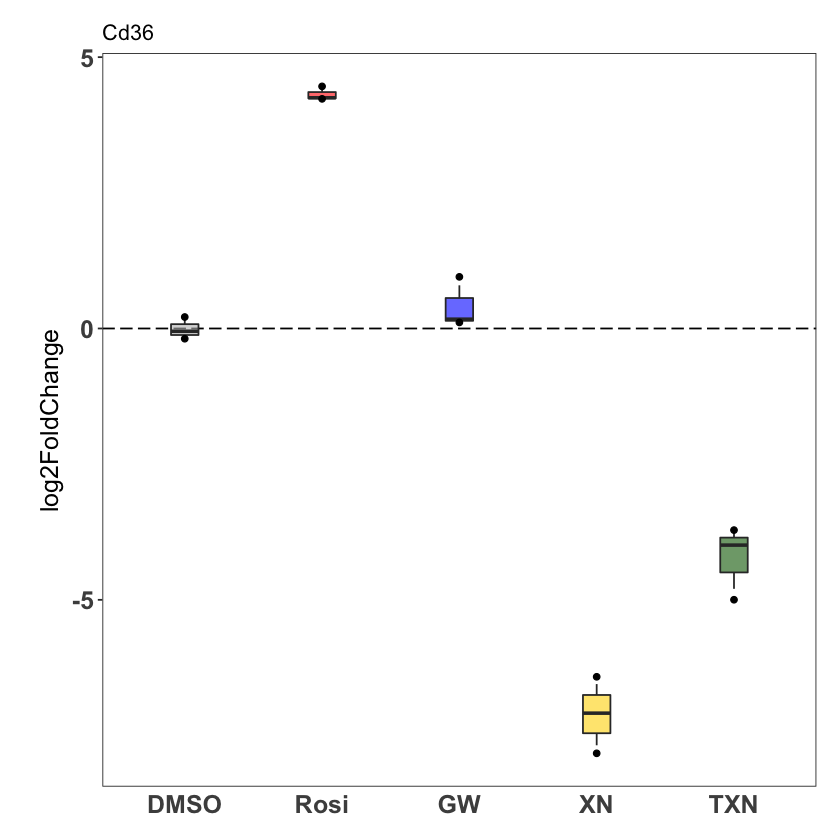

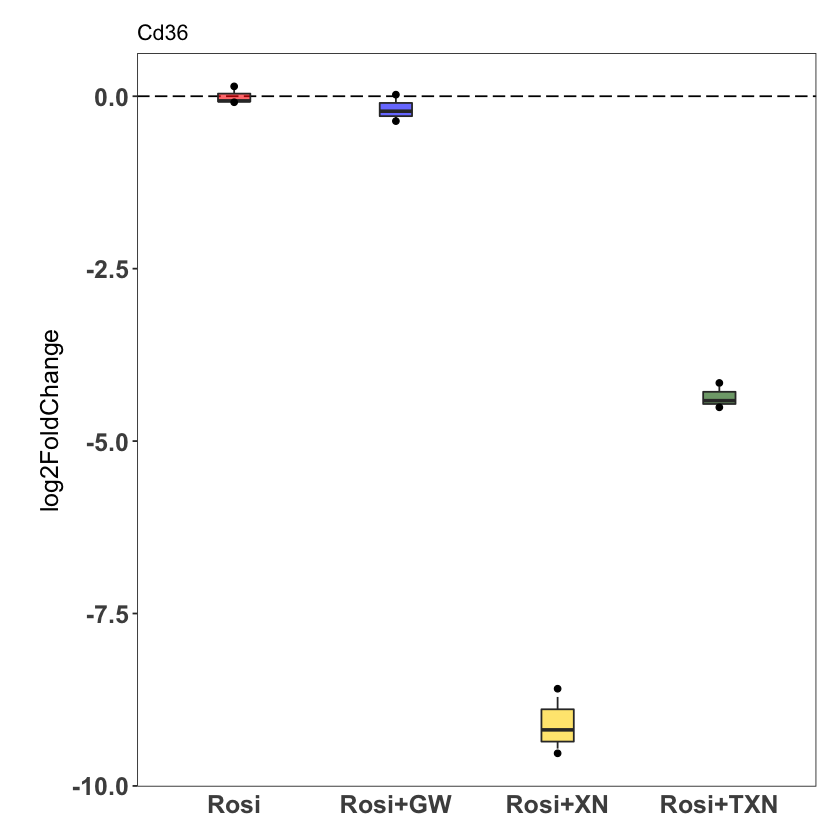

In [12]:
cd7 <- ggplot(data = data_dmso7, aes(x = vars, y = cd36, fill = vars)) +
    geom_hline(yintercept = 0, lty = 5) +
	stat_summary(fun.data = pars, geom = "boxplot", position = "dodge", width=0.2) +
	stat_summary(fun.y = outliers, geom = "point") +
	scale_fill_manual(values = alpha(colors, .6)) +
    #scale_y_continuous(limits = c(-3, 3))+
	xlab(" ") + ylab("log2FoldChange") +
	ggtitle("Cd36") +
	theme_bw() +
	theme_legend_free()

cdR7 <- ggplot(data = data_r7, aes(x = vars, y = cd36, fill = vars)) +
    geom_hline(yintercept = 0, lty = 5) +
	stat_summary(fun.data = pars, geom = "boxplot", position = "dodge", width=0.2) +
	stat_summary(fun.y = outliers, geom = "point") +
	scale_fill_manual(values = alpha(colorsR, .6)) +
    #scale_y_continuous(limits = c(-3, 3))+
	xlab(" ") + ylab("log2FoldChange") +
	ggtitle("Cd36") +
	theme_bw() +
	theme_legend_free()
cd7
cdR7

In [9]:
scd <- ggplot(data = data_dmso, aes(x = vars, y = scd1, fill = vars)) +
    geom_hline(yintercept = 0, lty = 5) +
	stat_summary(fun.data = pars, geom = "boxplot", position = "dodge", width=0.2) +
	stat_summary(fun.y = outliers, geom = "point") +
	scale_fill_manual(values = alpha(colors, .6)) +
    #scale_y_continuous(limits = c(-3, 3))+
	xlab(" ") + ylab("log2FoldChange") +
	ggtitle("Scd1") +
	theme_bw() +
	theme_legend_free()

scdR <- ggplot(data = data_r, aes(x = vars, y = scd1, fill = vars)) +
    geom_hline(yintercept = 0, lty = 5) +
	stat_summary(fun.data = pars, geom = "boxplot", position = "dodge", width=0.2) +
	stat_summary(fun.y = outliers, geom = "point") +
	scale_fill_manual(values = alpha(colorsR, .6)) +
    #scale_y_continuous(limits = c(-3, 3))+
	xlab(" ") + ylab("log2FoldChange") +
	ggtitle("Scd1") +
	theme_bw() +
	theme_legend_free()

In [10]:
sreb <- ggplot(data = data_dmso, aes(x = vars, y = srebp1c, fill = vars)) +
    geom_hline(yintercept = 0, lty = 5) +
	stat_summary(fun.data = pars, geom = "boxplot", position = "dodge", width=0.2) +
	stat_summary(fun.y = outliers, geom = "point") +
	scale_fill_manual(values = alpha(colors, .6)) +
    #scale_y_continuous(limits = c(-3, 3))+
	xlab(" ") + ylab("log2FoldChange") +
	ggtitle("Srebp1c") +
	theme_bw() +
	theme_legend_free()

srebR <- ggplot(data = data_r, aes(x = vars, y = srebp1c, fill = vars)) +
    geom_hline(yintercept = 0, lty = 5) +
	stat_summary(fun.data = pars, geom = "boxplot", position = "dodge", width=0.2) +
	stat_summary(fun.y = outliers, geom = "point") +
	scale_fill_manual(values = alpha(colorsR, .6)) +
    #scale_y_continuous(limits = c(-3, 3))+
	xlab(" ") + ylab("log2FoldChange") +
	ggtitle("Srebp1c") +
	theme_bw() +
	theme_legend_free()

In [11]:
lpl <- ggplot(data = data_dmso, aes(x = vars, y = lpl, fill = vars)) +
    geom_hline(yintercept = 0, lty = 5) +
	stat_summary(fun.data = pars, geom = "boxplot", position = "dodge", width=0.2) +
	stat_summary(fun.y = outliers, geom = "point") +
	scale_fill_manual(values = alpha(colors, .6)) +
    #scale_y_continuous(limits = c(-3, 3))+
	xlab(" ") + ylab("log2FoldChange") +
	ggtitle("Lpl") +
	theme_bw() +
	theme_legend_free()

lplR <- ggplot(data = data_r, aes(x = vars, y = lpl, fill = vars)) +
    geom_hline(yintercept = 0, lty = 5) +
	stat_summary(fun.data = pars, geom = "boxplot", position = "dodge", width=0.2) +
	stat_summary(fun.y = outliers, geom = "point") +
	scale_fill_manual(values = alpha(colorsR, .6)) +
    #scale_y_continuous(limits = c(-3, 3))+
	xlab(" ") + ylab("log2FoldChange") +
	ggtitle("Lpl") +
	theme_bw() +
	theme_legend_free()

In [21]:
plin <- ggplot(data = data_dmso, aes(x = vars, y = plin4, fill = vars)) +
    geom_hline(yintercept = 0, lty = 5) +
	stat_summary(fun.data = pars, geom = "boxplot", position = "dodge", width=0.2) +
	stat_summary(fun.y = outliers, geom = "point") +
	scale_fill_manual(values = alpha(colors, .6)) +
    #scale_y_continuous(limits = c(-3, 3))+
	xlab(" ") + ylab("log2FoldChange") +
	ggtitle("Plin4") +
	theme_bw() +
	theme_legend_free()

plinR <- ggplot(data = data_r, aes(x = vars, y = plin4, fill = vars)) +
    geom_hline(yintercept = 0, lty = 5) +
	stat_summary(fun.data = pars, geom = "boxplot", position = "dodge", width=0.2) +
	stat_summary(fun.y = outliers, geom = "point") +
	scale_fill_manual(values = alpha(colorsR, .6)) +
    #scale_y_continuous(limits = c(-3, 3))+
	xlab(" ") + ylab("log2FoldChange") +
	ggtitle("Plin4") +
	theme_bw() +
	theme_legend_free()

In [5]:
cid <- ggplot(data = data_dmso, aes(x = vars, y = cidec, fill = vars)) +
    geom_hline(yintercept = 0, lty = 5) +
	stat_summary(fun.data = pars, geom = "boxplot", position = "dodge", width=0.2) +
	stat_summary(fun.y = outliers, geom = "point") +
	scale_fill_manual(values = alpha(colors, .6)) +
    #scale_y_continuous(limits = c(-3, 3))+
	xlab(" ") + ylab("log2FoldChange") +
	ggtitle("Cidec") +
	theme_bw() +
	theme_legend_free()

cidR <- ggplot(data = data_r, aes(x = vars, y = cidec, fill = vars)) +
    geom_hline(yintercept = 0, lty = 5) +
	stat_summary(fun.data = pars, geom = "boxplot", position = "dodge", width=0.2) +
	stat_summary(fun.y = outliers, geom = "point") +
	scale_fill_manual(values = alpha(colorsR, .6)) +
    #scale_y_continuous(limits = c(-3, 3))+
	xlab(" ") + ylab("log2FoldChange") +
	ggtitle("Cidec") +
	theme_bw() +
	theme_legend_free()

In [125]:
plot <- (pparg | pgc | fab) / (cd | scd | sreb)
plot2 <- plot + plot_annotation(
  title = '25 µM XN inhibits Ibmx+Dex+insulin induced differentiation (N=3)'
) & theme(plot.title = element_text(size = 18, face='bold'))

In [126]:
graph2pdf(plot2, file = "plot.pdf", width = 16, height = 8)

Exported graph as plot.pdf



In [127]:
plotR <- (ppargR | pgcR | fabR) / (cdR | scdR | srebR)
plot2R <- plotR + plot_annotation(
  title = '25 µM XN and TXN suppress rosiglitazone induced differentiation (N=3)'
) & theme(plot.title = element_text(size = 18, face='bold'))

In [128]:
graph2pdf(plot2R, file = "plotR.pdf", width = 16, height = 8)

Exported graph as plotR.pdf



In [6]:
graph2pdf(cid, file = "cidec.pdf", width = 6, height = 5)

Exported graph as cidec.pdf



In [7]:
graph2pdf(cidR, file = "cidecR.pdf", width = 6, height = 5)

Exported graph as cidecR.pdf



In [35]:
ts_dmso <- read.csv('dmso-timeseries.csv')
ts_dmso$treatment <- as.factor(ts_dmso$treatment)
ts_dmso$time <- as.factor(ts_dmso$time)
ts_dmso$vars <- factor(ts_dmso$treatment, levels = c("DMSO", "Rosi", "GW", "XN", "TXN"))
colors <- c("grey", "red", "blue", "gold", "darkgreen")
head(ts_dmso)
rosi <- ts_dmso %>% filter(vars == "Rosi")
rosi

,time,treatment,cd36,vars
,<fct>,<fct>,<dbl>,<fct>
1,24hr,DMSO,0.6679965,DMSO
2,24hr,DMSO,-0.1386702,DMSO
3,24hr,DMSO,-0.9920035,DMSO
4,24hr,Rosi,3.2446631,Rosi
5,24hr,Rosi,2.1913298,Rosi
6,24hr,Rosi,1.9396631,Rosi


time,treatment,cd36,vars
<fct>,<fct>,<dbl>,<fct>
24hr,Rosi,3.2446631,Rosi
24hr,Rosi,2.1913298,Rosi
24hr,Rosi,1.9396631,Rosi
4d,Rosi,0.4367400,Rosi
4d,Rosi,0.1000733,Rosi
4d,Rosi,0.1700733,Rosi
7d,Rosi,4.4614429,Rosi
7d,Rosi,4.2314429,Rosi
7d,Rosi,4.2514429,Rosi


In [6]:
ggplot(ts_dmso, aes(x=time, y=cd36, colour=vars)) +
  geom_line() + 
  #geom_point(shape=21, color="black", fill="#69b3a2", size=6)

ERROR: Error in ggplot(ts_dmso, aes(x = time, y = cd36, colour = vars)): object 'ts_dmso' not found


In [23]:
data <- read.table("https://raw.githubusercontent.com/holtzy/data_to_viz/master/Example_dataset/3_TwoNumOrdered.csv", header=T)
data$date <- as.Date(data$date)

In [24]:
data

date,value
<date>,<dbl>
2013-04-28,135.98
2013-04-29,147.49
2013-04-30,146.93
2013-05-01,139.89
2013-05-02,125.60
2013-05-03,108.13
2013-05-04,115.00
2013-05-05,118.80
2013-05-06,124.66
